In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [3]:
data = pd.read_csv("traffic.csv")
data.head()

,Date,Visits
0,01-01-2020,1554.0
1,01-02-2020,2820.0
2,01-03-2020,2970.0
3,01-04-2020,2111.0
4,01-05-2020,2393.0


In [4]:
data.describe()

,Visits
count,232.000000
mean,4081.435345
std,1018.730432
min,1554.000000
25%,3428.250000
50%,3988.000000
75%,4874.750000
max,6659.000000


In [5]:
 data["Date"] = data["Date"].str.replace("/", "-")

In [6]:
data["Date"] = pd.to_datetime(data["Date"], format="%m-%d-%Y")

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    232 non-null    datetime64[ns]
 1   Visits  232 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 30.1 KB
None


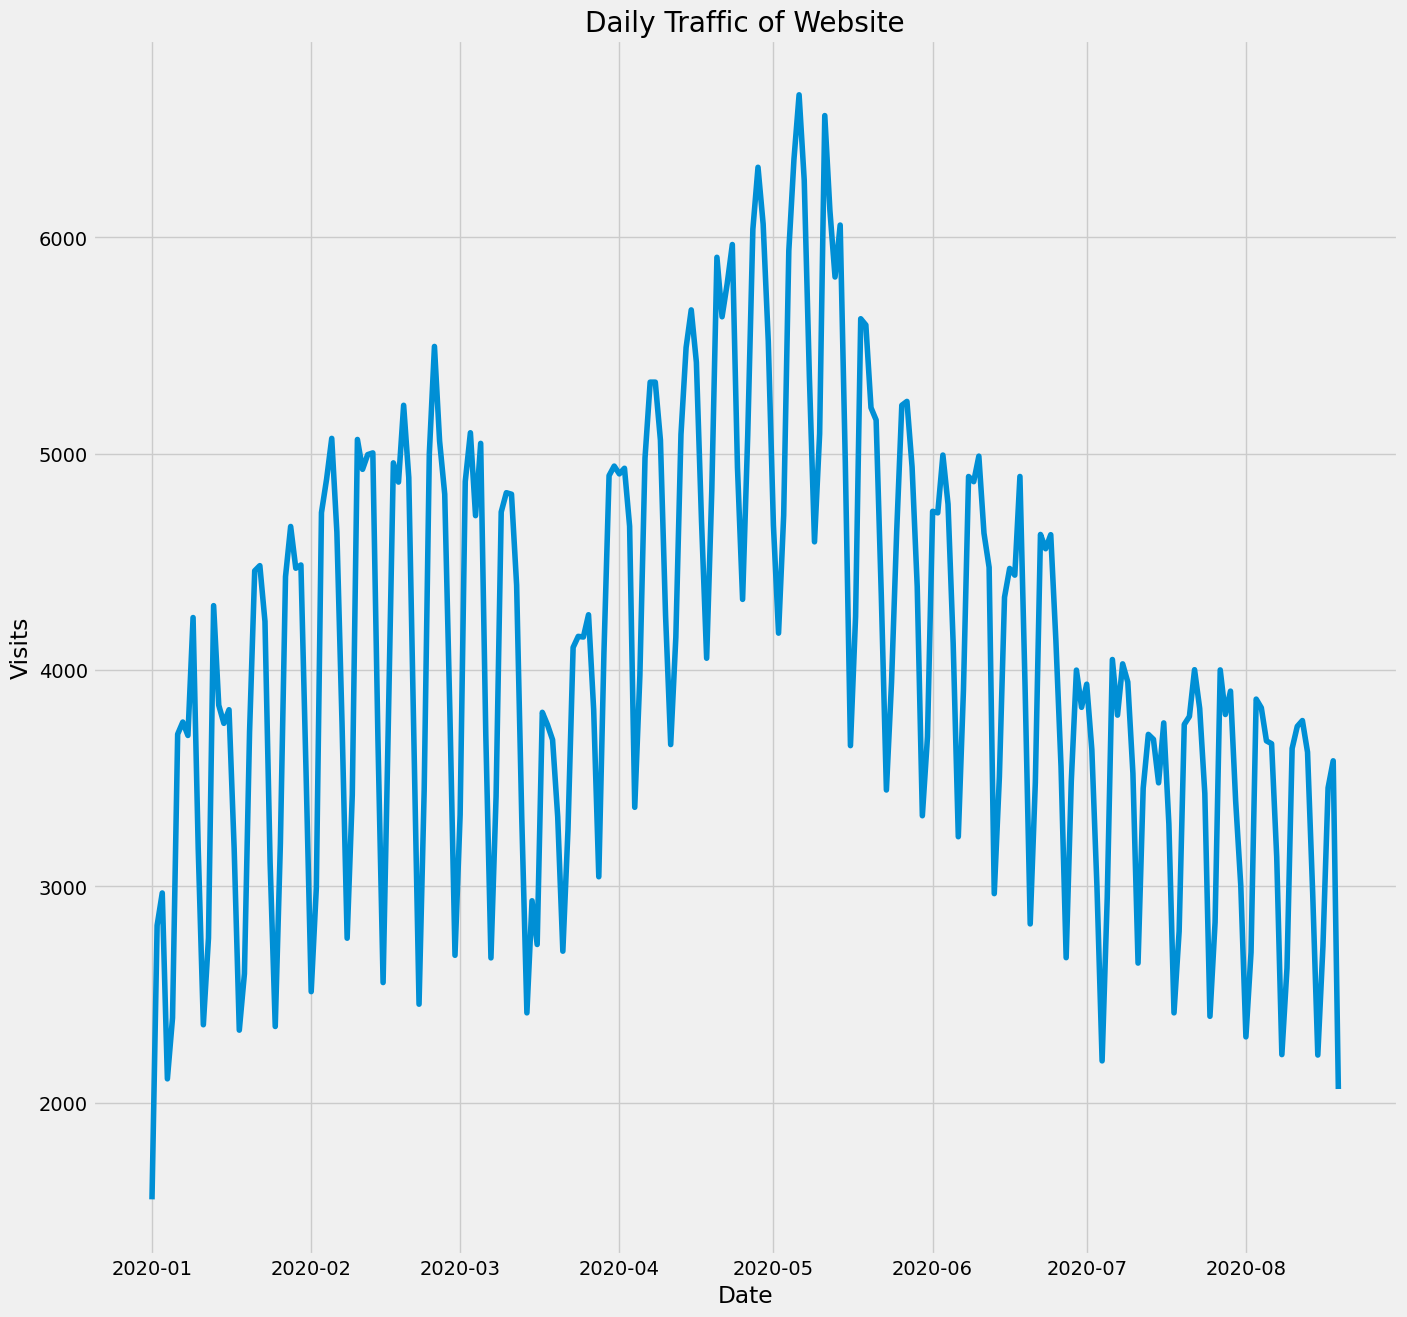

In [23]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15, 15))
plt.plot(data["Date"], data["Visits"])
plt.title("Daily Traffic of Website")
plt.xlabel('Date')
plt.ylabel('Visits')
plt.show()

In [18]:
data = data.dropna(axis=0)

<Figure size 640x480 with 0 Axes>

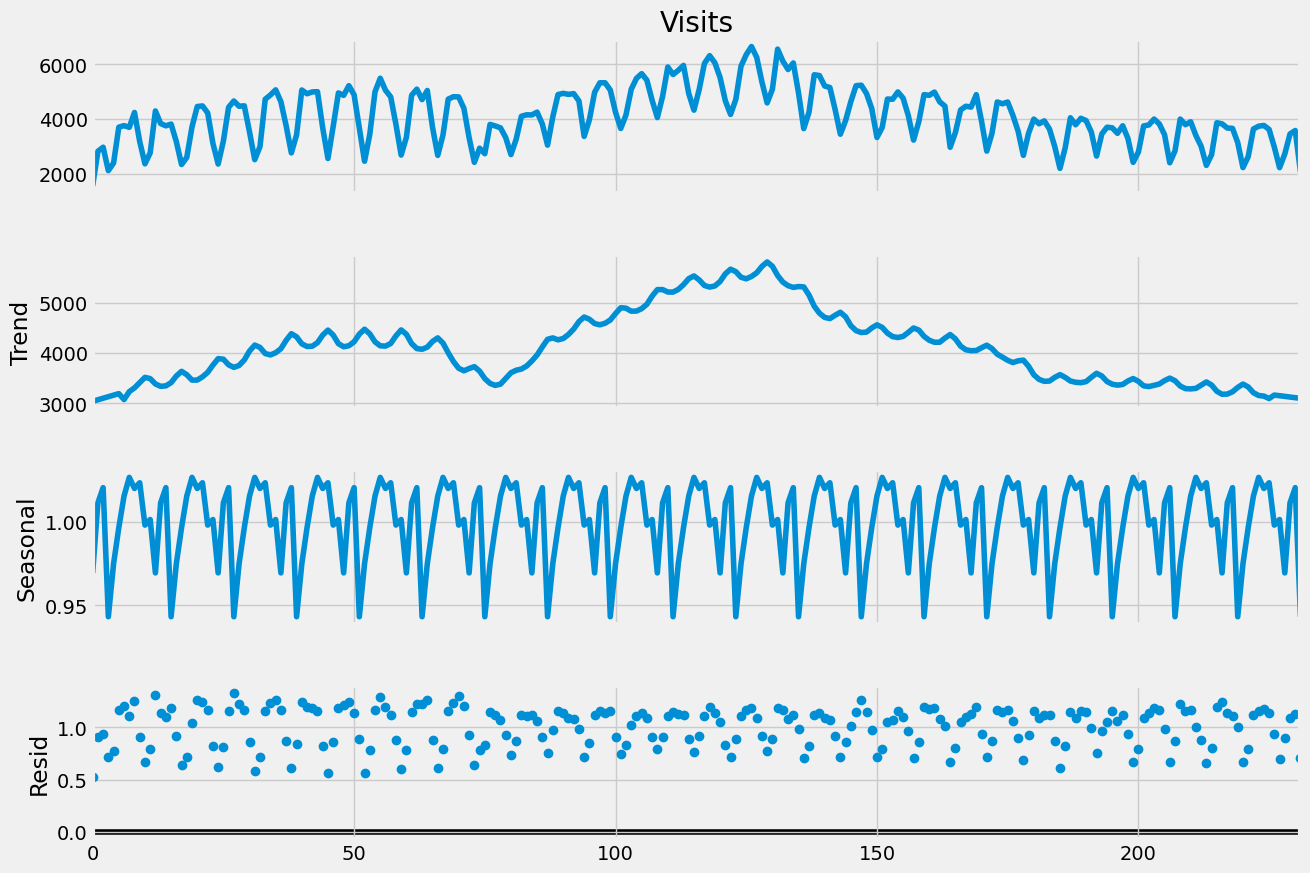

In [22]:
result = seasonal_decompose(data["Visits"], 
                            model='multiplicative', 
                            extrapolate_trend='freq', 
                            period=12)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

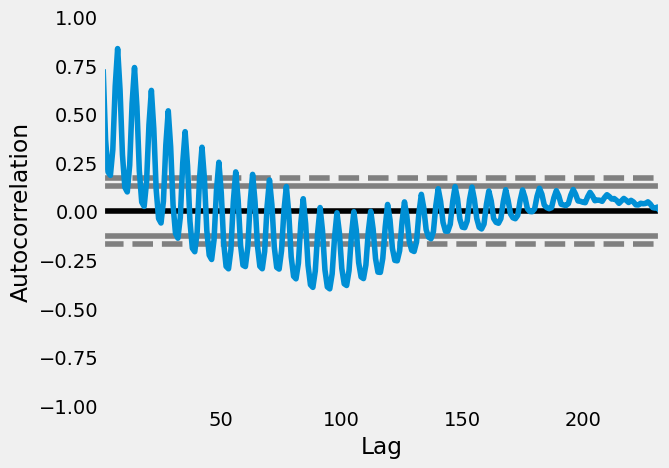

In [20]:
pd.plotting.autocorrelation_plot(data["Visits"])

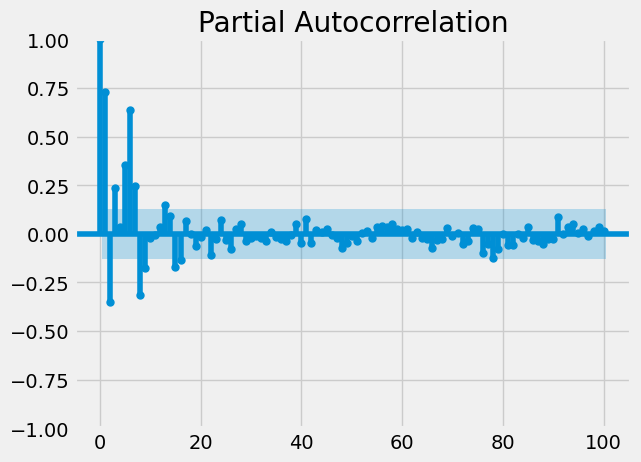

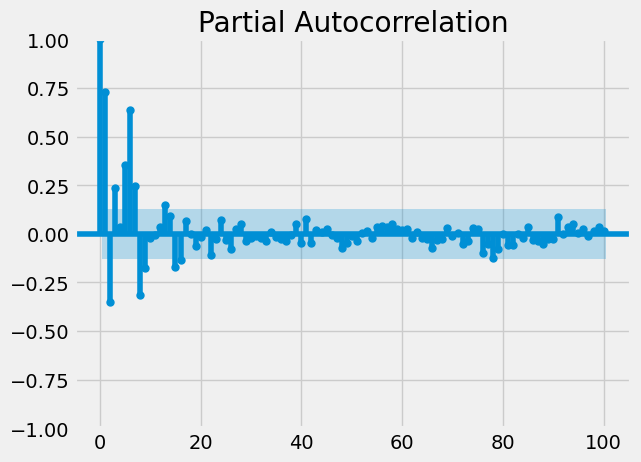

In [12]:
plot_pacf(data["Visits"], lags = 100)

In [26]:
p, d, q = 5, 1, 3
model=sm.tsa.statespace.SARIMAX(data['Visits'],
                     order=(p, d, q),
                     seasonal_order=(p, d, q, 12))

model=model.fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18475D+00    |proj g|=  3.17744D-01


 This problem is unconstrained.



At iterate    5    f=  7.01187D+00    |proj g|=  2.53435D-01

At iterate   10    f=  6.96795D+00    |proj g|=  3.55377D-02

At iterate   15    f=  6.95100D+00    |proj g|=  7.01330D-02

At iterate   20    f=  6.94982D+00    |proj g|=  9.61235D-03

At iterate   25    f=  6.94803D+00    |proj g|=  4.67970D-02

At iterate   30    f=  6.94621D+00    |proj g|=  3.80870D-02

At iterate   35    f=  6.94473D+00    |proj g|=  6.89002D-02

At iterate   40    f=  6.94241D+00    |proj g|=  5.78381D-02

At iterate   45    f=  6.94078D+00    |proj g|=  3.78858D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.93946D+00    |proj g|=  5.30292D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     60      1     0     0   5.303D-02   6.939D+00
  F =   6.9394561501780361     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                             Visits   No. Observations:                  232
Model:             SARIMAX(5, 1, 3)x(5, 1, 3, 12)   Log Likelihood               -1609.954
Date:                            Sun, 10 Dec 2023   AIC                           3253.9

In [27]:
preds = model.predict(len(data), len(data) + 50)
print(preds)

232    2164.524034
233    2086.822925
234    2171.395873
235    2936.227348
236    3843.081662
237    3269.918848
238    2238.058637
239    2150.551499
240    2185.400112
241    2116.575695
242    2846.886043
243    3040.389175
244    2574.239595
245    1900.964083
246    2125.549160
247    2385.033997
248    2245.986783
249    2699.846756
250    3117.741076
251    2610.927138
252    1876.093745
253    2105.975393
254    2321.921530
255    1859.005003
256    2351.963704
257    2934.144401
258    2589.074566
259    2055.717060
260    2169.842075
261    2290.355033
262    1999.263822
263    2429.129898
264    2832.198082
265    2525.192358
266    2012.597617
267    1969.678600
268    2087.619390
269    1947.634484
270    2387.267405
271    2925.840690
272    2481.911888
273    1987.118486
274    2074.456258
275    2206.899962
276    1915.378294
277    2347.985425
278    2813.873407
279    2157.047380
280    1728.990782
281    1990.908187
282    2187.164302
Name: predicted_mean, dtype: fl

<Axes: >

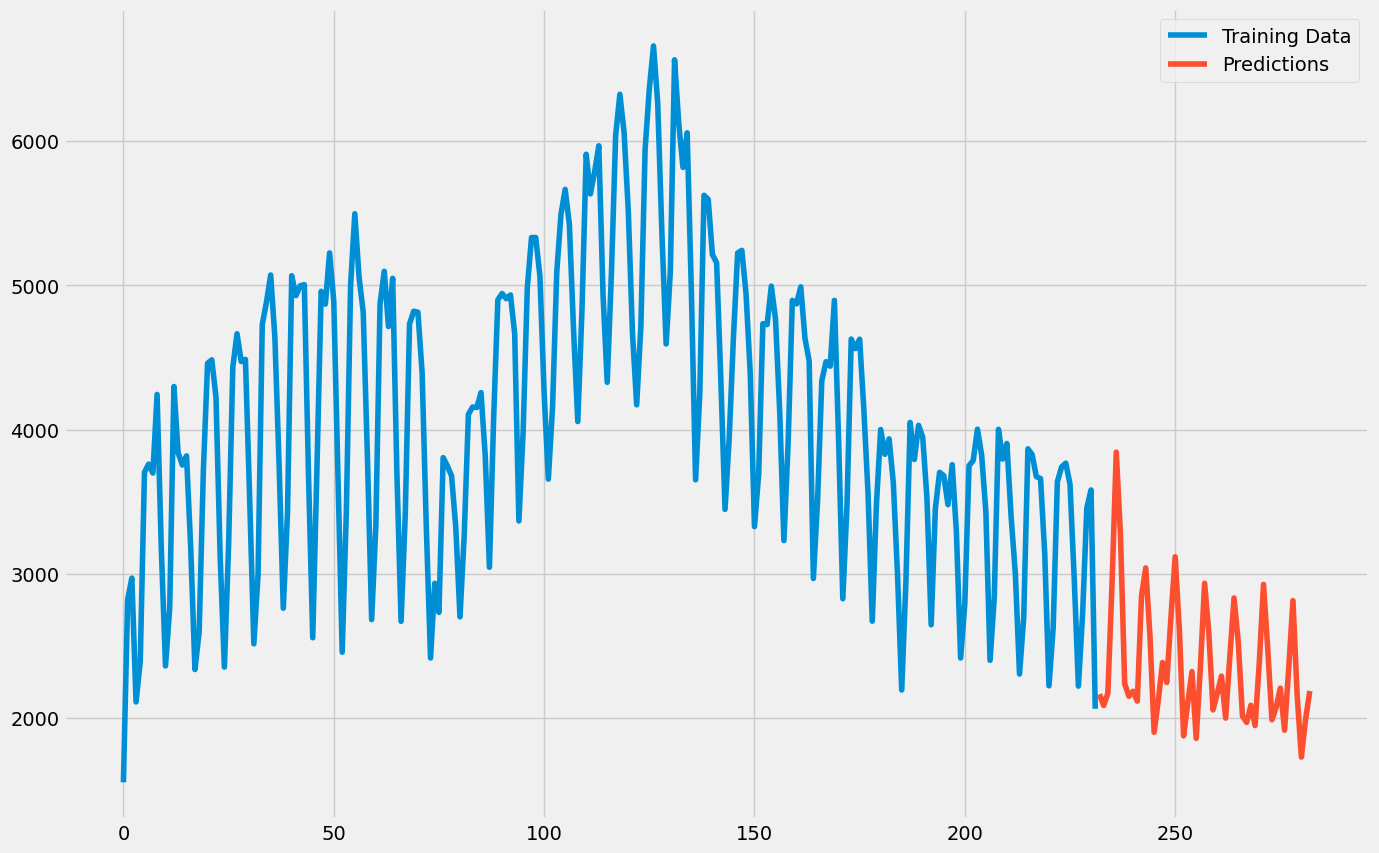

In [28]:
data["Visits"].plot(legend=True, label="Training Data",
                    figsize=(15, 10))
preds.plot(legend=True, label="Predictions")